In [1]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

assets = pd.read_csv('../data/staging_assets.csv')
assets.dtypes

address        object
domains        object
first_seen     object
hostname       object
ip_version      int64
known            bool
last_seen      object
name           object
online           bool
risk_score    float64
dtype: object

In [2]:
assets.head()

,address,domains,first_seen,hostname,ip_version,known,last_seen,name,online,risk_score
0,3.224.115.40,ec2-3-224-115-40.compute-1.amazonaws.com,2022-10-14T00:00:00.875836Z,ec2-3-224-115-40.compute-1.amazonaws.com,4,False,2022-10-26T00:00:00.417605Z,ec2-3-224-115-40.compute-1.amazonaws.com,True,6.528397
1,3.219.196.169,ec2-3-219-196-169.compute-1.amazonaws.com,2022-10-04T00:00:00.346170Z,ec2-3-219-196-169.compute-1.amazonaws.com,4,False,2022-10-04T00:00:00.346170Z,ec2-3-219-196-169.compute-1.amazonaws.com,True,16.320992
2,143.204.86.22,"server-143-204-86-22.nrt12.r.cloudfront.net,do...",2022-05-10T00:00:00.812885Z,server-143-204-86-22.nrt12.r.cloudfront.net,4,False,2022-05-10T00:00:00.812885Z,documentation.catosec.io,True,9.792595
3,52.203.213.7,ec2-52-203-213-7.compute-1.amazonaws.com,2022-10-13T00:00:00.446386Z,ec2-52-203-213-7.compute-1.amazonaws.com,4,False,2022-10-13T00:00:00.446386Z,ec2-52-203-213-7.compute-1.amazonaws.com,True,16.320992
4,108.138.85.73,"server-108-138-85-73.iad12.r.cloudfront.net,do...",2022-10-15T00:00:00.364146Z,server-108-138-85-73.iad12.r.cloudfront.net,4,False,2022-10-15T00:00:00.364146Z,documentation.catosec.io,True,9.792595


<AxesSubplot:xlabel='risk_score', ylabel='Count'>

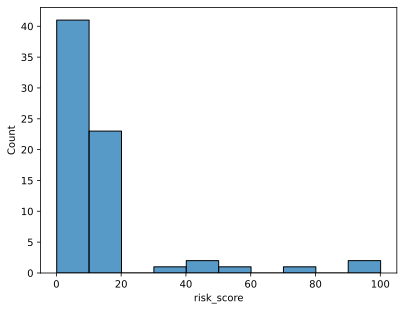

In [3]:
sns.histplot(assets, x='risk_score', binwidth=10)

In [4]:
def score_to_text( row ):
    score = row['risk_score']
    if score < 10:
        return "Low"
    elif score < 90:
        return "Medium"
    return "High"

assets['score'] = assets.apply(lambda row: score_to_text(row), axis=1)
assets.head()

,address,domains,first_seen,hostname,ip_version,known,last_seen,name,online,risk_score,score
0,3.224.115.40,ec2-3-224-115-40.compute-1.amazonaws.com,2022-10-14T00:00:00.875836Z,ec2-3-224-115-40.compute-1.amazonaws.com,4,False,2022-10-26T00:00:00.417605Z,ec2-3-224-115-40.compute-1.amazonaws.com,True,6.528397,Low
1,3.219.196.169,ec2-3-219-196-169.compute-1.amazonaws.com,2022-10-04T00:00:00.346170Z,ec2-3-219-196-169.compute-1.amazonaws.com,4,False,2022-10-04T00:00:00.346170Z,ec2-3-219-196-169.compute-1.amazonaws.com,True,16.320992,Medium
2,143.204.86.22,"server-143-204-86-22.nrt12.r.cloudfront.net,do...",2022-05-10T00:00:00.812885Z,server-143-204-86-22.nrt12.r.cloudfront.net,4,False,2022-05-10T00:00:00.812885Z,documentation.catosec.io,True,9.792595,Low
3,52.203.213.7,ec2-52-203-213-7.compute-1.amazonaws.com,2022-10-13T00:00:00.446386Z,ec2-52-203-213-7.compute-1.amazonaws.com,4,False,2022-10-13T00:00:00.446386Z,ec2-52-203-213-7.compute-1.amazonaws.com,True,16.320992,Medium
4,108.138.85.73,"server-108-138-85-73.iad12.r.cloudfront.net,do...",2022-10-15T00:00:00.364146Z,server-108-138-85-73.iad12.r.cloudfront.net,4,False,2022-10-15T00:00:00.364146Z,documentation.catosec.io,True,9.792595,Low


In [5]:
assets[['score']].value_counts()

score 
High      55
Low       41
Medium    28
dtype: int64

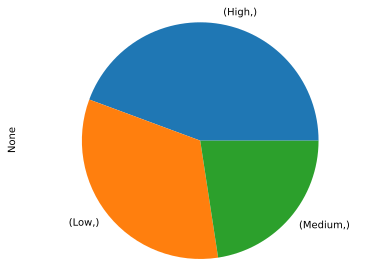

In [6]:
assets[['score']].value_counts().plot(kind='pie')
plt.axis('equal')
plt.show()

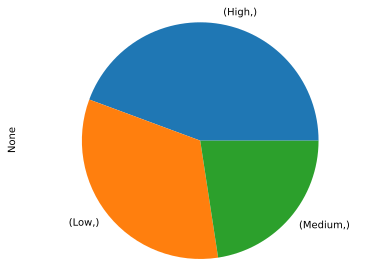

In [8]:
assets[['score']].value_counts().plot(kind='pie')
plt.axis('equal')
plt.savefig('../data/score_pie.png')